<a href="https://colab.research.google.com/github/realmistic/pysteps-basic-fin-analysis/blob/master/Part4_Scrapping_EPS_Q2_20_and_Daily_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The grand idea**: check the financials reporting vs. stock performance.

**Additional Links**:
* Company guidance on earnings: https://www.investopedia.com/terms/g/guidance.asp
* Price to earnings ratio: https://www.investopedia.com/terms/p/price-earningsratio.asp

* Trading Revolut: https://www.revolut.com/legal/trading
* (For next articles) New features Revolut: Out of Hours Orders, Limit Orders, Stop Loss Orders


**ARTICLE OUTLINE**

**Intro** The stocks ownership gives you the right to share in the profits of the company ([wiki article](https://en.wikipedia.org/wiki/Common_stock)). In an ideal world it should be highly dependant on the earnings of the company, as the price of the stock is a discounted future profits. If at some point a company earns more than previously - it might mean that the growth of a company is accelerated and the stock should be priced higher.
That's why among other financials to follow - earnings per share (EPS) is one of the most important one. Every quarter analysts make predictions on the company profits (or losses) and then check those predictions vs. actual reported EPS.
If the company is doing better than predicted - it should cause the stocks price increast, and vice versa.

In this article we aim to test this at scale - for hundreds of stocks that reported earnings in 2020 Q2. We will check the dependency of a stock's price fluctuation vs. actual EPS, predicted EPS, and Surprise 

**Part 0** Describe scraping - HTTP request with Params, Chrome Dev tools - check DOM (span, table, tr, tags) and apply that with Beautiful Soup

**Part 4.1** Describe 1 day financials for Facebook. Important caveat : reporting date is wrong on the website (it is 1 day earlier - for the most of large stocks)

**Part 1** Pack everything in 1 function to get a weekly stats on the dates and EPS

**Part 4.2** Get stock returns and volume for all found tickers in Yahoo finance -> join the datasets on a Ticker (Symbol) key.

**Part 5** The distribution of returns and the visualisation


**Conclusion** We've shown how to scrape the financial predictions from a website and how to connect them together with the stock returns. Q2'20 seems to be a very successfull quarter for the top 50 (on volume trade) stocks - most of them showing the positive surprise over the expected earnings-per-share (EPS) and high short-term returns. The result remains strong even after the corresponding S&P500 index returns are deducted (i.e. the top 50 stocks had higher positive growth than average index dynamics).
When scaled to top-200 stocks - the result is not that simple - the average returns are smaller, and there is more variation in EPS and the returns.


# 0) Scrape ONE PAGE data on stocks financials (earnings-per-share) : STEP-BY-STEP

In [ ]:
!pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
url = "https://finance.yahoo.com/calendar/earnings?from=2020-07-26&to=2020-08-01&day=2020-07-27"

In [ ]:
r = requests.get(url)

In [ ]:
r.ok

True

In [ ]:
r.status_code

200

In [ ]:
r.headers

{'Referrer-Policy': 'no-referrer-when-downgrade', 'Strict-Transport-Security': 'max-age=15552000', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Security-Policy': 'sandbox allow-downloads allow-forms allow-modals allow-same-origin allow-scripts allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation allow-presentation;', 'Content-Type': 'text/html; charset=utf-8', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Set-Cookie': 'B=89apmd9fjcqe5&b=3&s=d3; expires=Fri, 14-Aug-2021 10:39:01 GMT; path=/; domain=.yahoo.com', 'Date': 'Fri, 14 Aug 2020 10:39:01 GMT', 'Age': '0', 'Server': 'ATS', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Expect-CT': 'max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff'}

In [ ]:
r.content

b'<!DOCTYPE html><html id="atomic" class="NoJs desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>Company Earnings Calendar - Yahoo Finance</title><meta name="keywords" content="Earnings Announcements, Company Earnings, EPS Estimates, Earnings Per Share, Conference Calls, Before Market Open, After Market Close"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="90376669494"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Learn when companies announce their quarterly and annual earnings, along with the latest EPS estimates and conference call times from Yahoo Finance."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvalidat

In [ ]:
soup = BeautifulSoup(r.text)

In [ ]:
table = soup.find_all('table')

In [ ]:
# Just 1 table found which is good
len(table)

1

In [ ]:
# Get all column names
spans = soup.table.thead.find_all('span')

In [ ]:
columns = []
for span in spans:
  print(span.text)
  columns.append(span.text)

Symbol
Company
Earnings Call Time
EPS Estimate
Reported EPS
Surprise(%)


In [ ]:
rows = soup.table.tbody.find_all('tr')

In [ ]:
# 100 rows in the table
len(rows)

100

In [ ]:
# read row by row
stocks_df = pd.DataFrame(columns=columns)

for row in rows:
  elems = row.find_all('td')
  dict_to_add = {}
  for i,elem in enumerate(elems):
    dict_to_add[columns[i]] = elem.text
    # if i<=2:
    #   dict_to_add[columns[i]]=elem.text
    # else:  
    #   dict_to_add[columns[i]]= float(elem.text)
  stocks_df = stocks_df.append(dict_to_add, ignore_index=True)  

In [ ]:
stocks_df

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%)
0,MMM,3M Company,Time Not Supplied,1.8,1.78,-1.17
1,ABG,"Asbury Automotive Group, Inc.",Time Not Supplied,2.49,2.52,+1.16
2,ASH,Ashland Global Holdings Inc.,Time Not Supplied,0.8,0.84,+4.74
3,AFL,Aflac Incorporated,Time Not Supplied,1.07,1.28,+20.08
4,AWI,"Armstrong World Industries, Inc.",Time Not Supplied,0.92,0.75,-18.12
...,...,...,...,...,...,...
95,COWN,Cowen Inc.,Time Not Supplied,4.76,5.69,+19.51
96,GAINM,Gladstone Investment Corporation,Time Not Supplied,0.18,0.13,-28.57
97,FTV,Fortive Corporation,Time Not Supplied,0.58,0.68,+16.84
98,FTV-PA,Fortive Corporation,Time Not Supplied,0.58,0.68,+16.84


In [ ]:
# 100 ROWS scraped and 6 columns. We will use all columns, but Earnings Call Time as it is not supplied in many cases
  # There are some problems in the dataset:
  #  - missing values, where EPS Estimate, Reported EPS, or Surprise are unknown
  #  - need to convert numetic values to float to work with them

stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Symbol              100 non-null    object
 1   Company             100 non-null    object
 2   Earnings Call Time  100 non-null    object
 3   EPS Estimate        100 non-null    object
 4   Reported EPS        100 non-null    object
 5   Surprise(%)         100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


# 1) Pack everything in one scrape function
* it returns stocks_df over 1 week
* call the function during the several weeks period

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as nm 
from datetime import datetime, timedelta, date

In [ ]:
# Need to supply weekly stats as you see on the website
# from_dt = '2020-07-26'
# to_dt = '2020-08-01'

def get_scrapped_week(from_dt, to_dt):

  # initially look at the first 100 stocks with earnings at the first day of the week (from_dt)  
  # FULL URL with PARAMS example: url = "https://finance.yahoo.com/calendar/earnings?from=2020-07-26&to=2020-08-01&day=2020-07-27" 
  url = "https://finance.yahoo.com/calendar/earnings"
  offset = 0
  size = 100
  fst = 1

  # scrape every date in the submitted interval 
  for day_date in (datetime.strptime(from_dt, '%Y-%m-%d')  + timedelta(n) for n in range(6)):
    day_dt = datetime.strftime(day_date, '%Y-%m-%d')
    print(day_dt)

    # inner cycle for iteration with offset, if more than 100 stocks earnings happenned that date  
    while True:
      # make URL request with the params
      params = {'from': from_dt, 'to': to_dt,'day': day_dt, 'offset':offset, 'size': size} 
      r = requests.get(url, params=params) 
      soup = BeautifulSoup(r.text) 

      # scrape table column names when going first time to create a correct dataframe
      if fst == 1:
        spans = soup.table.thead.find_all('span')
        columns = []
        for span in spans:
          print(span.text)
          columns.append(span.text)
        stocks_df = pd.DataFrame(columns=columns)
        fst = 0

      # scrape body with row values
      rows = soup.table.tbody.find_all('tr') 
      for row in rows:
        elems = row.find_all('td')
        dict_to_add = {}
        dict_to_add['Date'] = day_dt
        for i,elem in enumerate(elems):
          dict_to_add[columns[i]]=elem.text
        stocks_df = stocks_df.append(dict_to_add, ignore_index=True)  
      if len(rows) != 100:
        print(len(rows)+offset)
        offset = 0
        break
      else: 
        offset = offset + 100
  
  return stocks_df

# stocks_df.to_csv('stocks.csv', index = False)

In [ ]:
stocks_df = get_scrapped_week('2020-07-05', '2020-07-11')

2020-07-05
Symbol
Company
Earnings Call Time
EPS Estimate
Reported EPS
Surprise(%)
8
2020-07-06
29
2020-07-07
26
2020-07-08
23
2020-07-09
25
2020-07-10
4


In [ ]:
stocks_df.head()

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date
0,AIABF,AirAsia Group Berhad,Time Not Supplied,-0.01,-0.15,-2400,2020-07-05
1,SINO,"Sino-Global Shipping America, Ltd.",Time Not Supplied,-,-,-,2020-07-05
2,AXAS,Abraxas Petroleum Corporation,Time Not Supplied,-0.01,-0.04,-471.43,2020-07-05
3,BSTJF,Boustead Projects Limited,Time Not Supplied,-,-,-,2020-07-05
4,CIDM,Cinedigm Corp.,Time Not Supplied,-,-,-,2020-07-05


In [ ]:
stocks_df = stocks_df.append(get_scrapped_week('2020-07-12', '2020-07-18'))

2020-07-12
Symbol
Company
Earnings Call Time
EPS Estimate
Reported EPS
Surprise(%)
17
2020-07-13
40
2020-07-14
39
2020-07-15
55
2020-07-16
43
2020-07-17
2


In [ ]:
stocks_df = stocks_df.append(get_scrapped_week('2020-07-19', '2020-07-25'))

2020-07-19
Symbol
Company
Earnings Call Time
EPS Estimate
Reported EPS
Surprise(%)
46
2020-07-20
103
2020-07-21
145
2020-07-22
195
2020-07-23
62
2020-07-24
11


In [ ]:
stocks_df = stocks_df.append(get_scrapped_week('2020-07-26', '2020-08-01'))

2020-07-26
Symbol
Company
Earnings Call Time
EPS Estimate
Reported EPS
Surprise(%)
129
2020-07-27
261
2020-07-28
346
2020-07-29
437
2020-07-30
181
2020-07-31
19


In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246 entries, 0 to 1372
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Symbol              2246 non-null   object
 1   Company             2246 non-null   object
 2   Earnings Call Time  2246 non-null   object
 3   EPS Estimate        2246 non-null   object
 4   Reported EPS        2246 non-null   object
 5   Surprise(%)         2246 non-null   object
 6   Date                2246 non-null   object
dtypes: object(7)
memory usage: 140.4+ KB


# 3) Clean up : no missing values and transform text to float

In [ ]:
filter1 = stocks_df['Surprise(%)']!='-'
filter2 = stocks_df['EPS Estimate']!='-'
filter3 = stocks_df['Reported EPS']!='-'

stocks_df_noMissing = stocks_df[filter1 & filter2 & filter3]

In [ ]:
# Around 20% had missing values
stocks_df_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 1372
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Symbol              1701 non-null   object
 1   Company             1701 non-null   object
 2   Earnings Call Time  1701 non-null   object
 3   EPS Estimate        1701 non-null   object
 4   Reported EPS        1701 non-null   object
 5   Surprise(%)         1701 non-null   object
 6   Date                1701 non-null   object
dtypes: object(7)
memory usage: 106.3+ KB


In [ ]:
# Convert to float numeric values
stocks_df_noMissing['EPS Estimate'] = stocks_df_noMissing['EPS Estimate'].astype(float)
stocks_df_noMissing['Reported EPS'] = stocks_df_noMissing['Reported EPS'].astype(float)
stocks_df_noMissing['Surprise(%)'] = stocks_df_noMissing['Surprise(%)'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# stocks_df_noMissing['Date'] = pd.to_datetime(stocks_df_noMissing['Date'])

# stocks_df_noMissing['Date'] = stocks_df_noMissing['Date'].astype(date)

In [ ]:
stocks_df_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 1372
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              1701 non-null   object 
 1   Company             1701 non-null   object 
 2   Earnings Call Time  1701 non-null   object 
 3   EPS Estimate        1701 non-null   float64
 4   Reported EPS        1701 non-null   float64
 5   Surprise(%)         1701 non-null   float64
 6   Date                1701 non-null   object 
dtypes: float64(3), object(4)
memory usage: 106.3+ KB


In [ ]:
stocks_df_noMissing.set_index('Symbol')

,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date
Symbol,,,,,,
AIABF,AirAsia Group Berhad,Time Not Supplied,-0.01,-0.15,-2400.00,2020-07-05
AXAS,Abraxas Petroleum Corporation,Time Not Supplied,-0.01,-0.04,-471.43,2020-07-05
MARK,"Remark Holdings, Inc.",Time Not Supplied,-0.06,-0.05,16.67,2020-07-05
ASPU,"Aspen Group, Inc.",Time Not Supplied,-0.05,-0.03,34.78,2020-07-06
AMLLF,"AEON Mall Co., Ltd.",Time Not Supplied,-17.92,-59.23,-230.61,2020-07-06
...,...,...,...,...,...,...
APLS,Apellis Pharmaceuticals Inc,TAS,-1.33,-1.57,-18.05,2020-07-31
ORC,Orchid Island Capital Inc,TAS,0.20,0.73,265.00,2020-07-31
ULH,Universal Logistics Holdings Inc,TAS,0.08,0.23,187.50,2020-07-31


In [ ]:
stocks_df_noMissing[stocks_df_noMissing['Symbol']=='GOOGL']

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date
752,GOOGL,Alphabet Inc.,Time Not Supplied,8.21,10.13,23.42,2020-07-29


# 4) Add stocks price for the companies

In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=ee4e4a26a29901c5749fbaea328a820cc979bf7639d36ecdebab2b98480c6a77
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


## 4.1) Try one stock one date --> calc returns and volume jump

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime  
from datetime import timedelta

In [ ]:
# Test dates
date = datetime.strptime('2020-08-08', '%Y-%m-%d')
print(date + timedelta(days=1))
print(date - timedelta(days=1))

2020-08-09 00:00:00
2020-08-07 00:00:00


In [ ]:
# IMPORTANT!!! For some reason the website has incorrect data for the day (one day earniere)
# https://abc.xyz/investor/static/pdf/2020Q2_alphabet_earnings_release.pdf?cache=a881c38
stocks_df_noMissing[stocks_df_noMissing['Symbol']=='GOOGL']

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date
752,GOOGL,Alphabet Inc.,Time Not Supplied,8.21,10.13,23.42,2020-07-29


In [ ]:
# https://s21.q4cdn.com/399680738/files/doc_financials/2020/q2/Q2'20-FB-Financial-Results-Press-Release.pdf
# SAME! date is wrong in the datasource
stocks_df_noMissing[stocks_df_noMissing['Symbol']=='FB']

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date
1023,FB,"Facebook, Inc.",Time Not Supplied,1.39,1.8,29.59,2020-07-29


In [ ]:
# https://seekingalpha.com/symbol/AMZN/earnings. -- announce date one day later
stocks_df_noMissing[stocks_df_noMissing['Symbol']=='AMZN']

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date
743,AMZN,"Amazon.com, Inc.",Time Not Supplied,1.46,10.3,605.48,2020-07-29


In [ ]:
stocks_df_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1332
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              1678 non-null   object 
 1   Company             1678 non-null   object 
 2   Earnings Call Time  1678 non-null   object 
 3   EPS Estimate        1678 non-null   float64
 4   Reported EPS        1678 non-null   float64
 5   Surprise(%)         1678 non-null   float64
 6   Date                1678 non-null   object 
dtypes: float64(3), object(4)
memory usage: 104.9+ KB


In [ ]:
row = stocks_df_noMissing[stocks_df_noMissing['Symbol']=='FB']
date = row['Date'].values[0]

In [ ]:
print(date)

2020-07-29


In [ ]:
date = datetime.strptime(row['Date'].values[0], '%Y-%m-%d')

print(date + timedelta(days=3))
print(date - timedelta(days=1))

ticker = yf.Ticker('FB')

# https://pypi.org/project/yfinance/
hist = yf.download("FB", start= date - timedelta(days=1), end=date + timedelta(days=3))

2020-08-01 00:00:00
2020-07-28 00:00:00
[*********************100%***********************]  1 of 1 completed


In [ ]:
hist

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100
2020-07-29,231.139999,233.699997,230.309998,233.289993,233.289993,13588300
2020-07-30,230.220001,234.889999,229.000000,234.500000,234.500000,20615300
2020-07-31,255.820007,255.850006,249.000000,253.669998,253.669998,53030000


In [ ]:
# 2 days returns -> should be defined only for the last observation
hist['r2'] = np.log(hist['Open'] / hist['Open'].shift(2))
hist['volume_rise'] = np.log(hist['Volume'] / hist['Volume'].shift(2))


In [ ]:
# exp(0.10)=1.10 or 10% INCREASE, AND exp(1.36)=3.9x VOLUME RISE OF TRADE FOR FACEBOOK
hist

,Open,High,Low,Close,Adj Close,Volume,r2,volume_rise
Date,,,,,,,,
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,NaN,NaN
2020-07-29,231.139999,233.699997,230.309998,233.289993,233.289993,13588300,NaN,NaN
2020-07-30,230.220001,234.889999,229.000000,234.500000,234.500000,20615300,-0.018974,0.374899
2020-07-31,255.820007,255.850006,249.000000,253.669998,253.669998,53030000,0.101451,1.361649


In [ ]:
# The last value of returns (r2 = 2-days return on the next morning after the event) in the dataframe
hist.r2.values[-1]

0.10145051589492579

In [ ]:
# Volume of trade rising
hist.volume_rise.values[-1]

1.361648662790037

## 4.15) Get S&P 500 stats

In [ ]:
import pandas_datareader.data as pdr
# from datetime import datetime
from datetime import date
# end = date.today()
# start = datetime(year=end.year, month=end.month-1, day=end.day) 

start = datetime(2020,7,1)
end = datetime(2020,8,10)
print(f'Period 1 year until today: {start} to {end} ')

spx_index = pdr.get_data_stooq('^SPX', start, end) 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Period 1 year until today: 2020-07-01 00:00:00 to 2020-08-10 00:00:00 


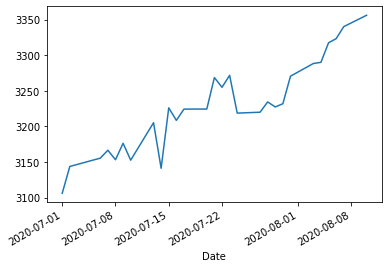

In [ ]:
# S&P500 index was growing almost all July 2020 --> need to adjust stock growth after the reporting date
spx_index['Open'].plot.line()

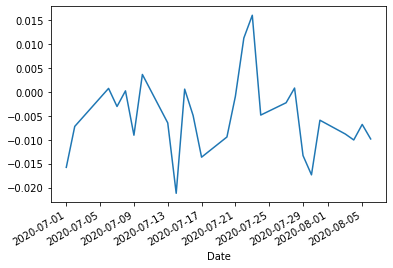

In [ ]:
# 2 days returns daily in July-Aug 2020

spx_index['r2'] = np.log(np.divide(spx_index['Open'] , spx_index['Open'].shift(2)))
spx_index['r2'].plot.line()

In [ ]:
spx_index.head(30)

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-10,3356.04,3363.29,3335.44,3360.47,2565981272
2020-08-07,3340.05,3352.54,3328.72,3351.28,2279160879
2020-08-06,3323.17,3351.03,3318.14,3349.16,2414075395
2020-08-05,3317.37,3330.77,3317.37,3327.77,2452040105
2020-08-04,3289.92,3306.84,3286.37,3306.51,2403695283
2020-08-03,3288.26,3302.73,3284.53,3294.61,2379546705
2020-07-31,3270.45,3272.17,3220.26,3271.12,3062620493
2020-07-30,3231.76,3250.92,3204.13,3246.22,2436861309
2020-07-29,3227.22,3264.74,3227.22,3258.44,2471114054


In [ ]:
# Filling an array of S&P return for corresponding stock
# Important: if there is a "gap" for that particular date -> we take the closest previous value
array_returns_snp500 = []
for index,row in stocks_df_noMissing.iterrows():  
  start_dt = datetime.strptime(row['Date'], '%Y-%m-%d') - timedelta(days = 1)
  end_dt = datetime.strptime(row['Date'], '%Y-%m-%d') + timedelta(days = 3)
  # we don't have gaps more than 4 days -> try to find the closest value of S&P500 returns in the dataframe:
  cur_dt = end_dt
  while cur_dt >= start_dt:
    rez_df = spx_index[cur_dt.strftime('%Y-%m-%d')]
    if len(rez_df)>0:
      array_returns_snp500.append(rez_df.r2.values[0])
      break
    else:
      cur_dt = cur_dt - timedelta(days = 1)

In [ ]:
len(array_returns_snp500)

1678

In [ ]:
len(stocks_df_noMissing)

1678

## 4.2) Get all stocks returns and volume rise

In [ ]:
# 2 days returns on open price after earnings vs. 2 days ago
array_tickers = []
array_returns = []
array_volume_rise = []
array_volume_usd = []
array_snp500 = []

for index,row in stocks_df_noMissing.iterrows():  
  start_dt = datetime.strptime(row['Date'], '%Y-%m-%d') - timedelta(days = 1)
  end_dt = datetime.strptime(row['Date'], '%Y-%m-%d') + timedelta(days = 3)
  hist = yf.download(row['Symbol'], start = start_dt, end = end_dt)
  # We need to have a full data : volume and price for all dates calculate the returns and volume rise
  # ALSO: if end_dt is non-trading day (Sat,Sun) --> we can't directly calc the stats of returns
  if len(hist)<4:
    continue
  hist['r2'] = np.log(np.divide(hist['Open'] , hist['Open'].shift(2)))
  hist['volume_rise'] = np.log(np.divide(hist['Volume'], hist['Volume'].shift(2)))
  hist['volume_usd'] = hist['Volume'] * hist['Open']
  print(row)
  print(index)
  # print(hist)
  print('--------------')
  array_tickers.append(row['Symbol'])
  array_returns.append(hist.r2.values[-1])
  array_volume_rise.append(hist.volume_rise.values[-1])  
  array_volume_usd.append(hist.volume_usd.values[-1])
  # We only append values S&P for the stocks that have all the data
  array_snp500.append(array_returns_snp500[index])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GEENQ: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***************

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Streaming output truncated to the last 5000 lines.
EPS Estimate                       0.05
Reported EPS                       0.06
Surprise(%)                          25
Date                         2020-07-28
Name: 633, dtype: object
633
--------------
[*********************100%***********************]  1 of 1 completed
Symbol                              JMP
Company                   JMP Group LLC
Earnings Call Time    Time Not Supplied
EPS Estimate                      -0.07
Reported EPS                       0.13
Surprise(%)                      285.71
Date                         2020-07-28
Name: 634, dtype: object
634
--------------
[*********************100%***********************]  1 of 1 completed
Symbol                                GSK
Company               GlaxoSmithKline plc
Earnings Call Time      Time Not Supplied
EPS Estimate                         0.51
Reported EPS                         0.46
Surprise(%)                          -9.8
Date                           

In [ ]:
# 964 stocks have financials: volume of trade, volume_rise (in stocks amount), and returns
len(array_tickers)

1003

## 4.4) Merge all together

In [ ]:
returns_df = pd.DataFrame(columns=['Ticker', 'Returns','Volume Rise','Volume Trade USD','Returns S&P500'])

returns_df = pd.DataFrame([array_tickers,array_returns,array_volume_rise,array_volume_usd, array_snp500]).transpose()

returns_df.columns=['Ticker','Returns','Volume Rise','Volume Trade USD', 'Returns S&P500']

returns_df.set_index('Ticker',inplace=True)

returns_df.dropna(inplace=True)

In [ ]:
returns_df['Returns'] = returns_df['Returns'].astype(float)
returns_df['Volume Rise'] = returns_df['Volume Rise'].astype(float)
returns_df['Volume Trade USD'] = returns_df['Volume Trade USD'].astype(float)
returns_df['Returns S&P500'] = returns_df['Returns S&P500'].astype(float)


In [ ]:
returns_df['Returns in %'] = np.exp(returns_df['Returns'])
returns_df['Volume Rise in %'] = np.exp(returns_df['Volume Rise'])

# Returns above S&P500
returns_df['Adj. Returns'] = returns_df['Returns'] - returns_df['Returns S&P500']
returns_df['Adj. Returns in %'] = np.exp(returns_df['Adj. Returns'])


In [ ]:
# if we want to have a hist -> no INF values
returns_df = returns_df.replace([np.inf, -np.inf], np.nan)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9a9abaf28>,
      dtype=object)

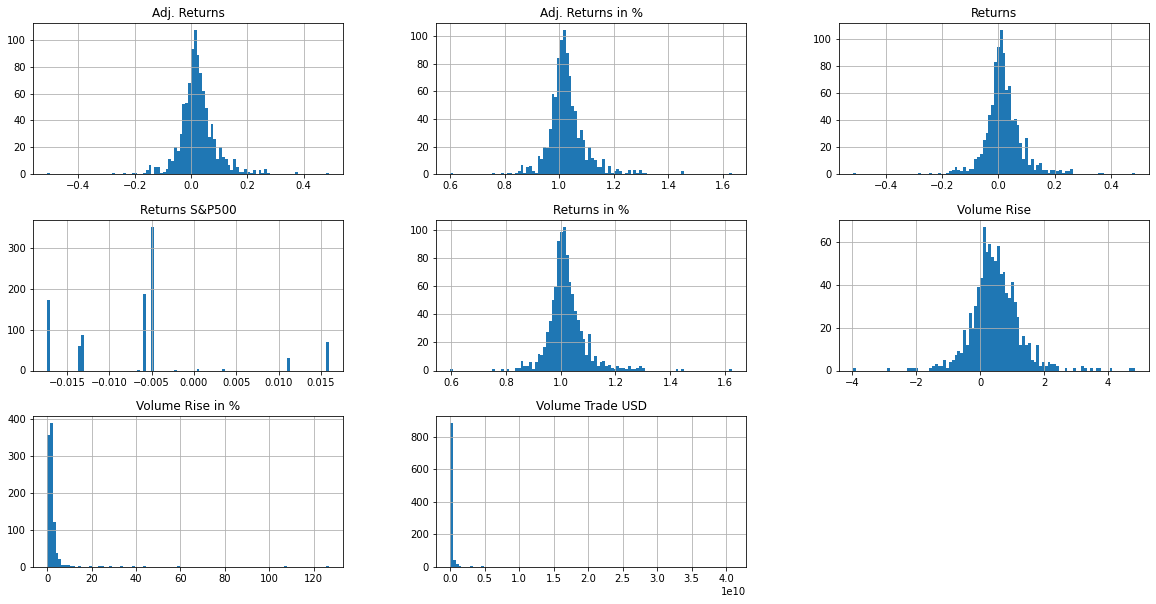

In [ ]:
returns_df.hist(figsize=(20,10), bins=100)

In [ ]:
stocks_and_returns = stocks_df_noMissing.set_index('Symbol').join(returns_df)

stocks_and_returns.head()

,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date,Returns,Volume Rise,Volume Trade USD,Returns S&P500,Returns in %,Volume Rise in %,Adj. Returns,Adj. Returns in %
AA,Alcoa Corporation,Time Not Supplied,-0.38,-0.02,94.81,2020-07-14,0.118369,0.378011,2.138873e+08,-0.004953,1.125659,1.459379,0.123322,1.131248
AAL,American Airlines Group Inc.,Time Not Supplied,-7.70,-7.82,-1.51,2020-07-22,0.025164,0.235963,6.273955e+08,-0.004863,1.025483,1.266127,0.030027,1.030482
AAN,"Aaron's, Inc.",Time Not Supplied,0.78,1.18,51.87,2020-07-28,0.168638,0.802252,7.449840e+07,-0.004863,1.183691,2.230558,0.173501,1.189462
AAPL,Apple Inc.,Time Not Supplied,2.04,2.58,26.22,2020-07-29,0.092980,1.421695,3.851364e+10,-0.017332,1.097440,4.144139,0.110312,1.116626
AAT,"American Assets Trust, Inc.",Time Not Supplied,0.11,0.13,18.18,2020-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
stocks_and_returns_no_missing = stocks_and_returns.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
stocks_and_returns_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, AA to ZEN
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             993 non-null    object 
 1   Earnings Call Time  993 non-null    object 
 2   EPS Estimate        993 non-null    float64
 3   Reported EPS        993 non-null    float64
 4   Surprise(%)         993 non-null    float64
 5   Date                993 non-null    object 
 6   Returns             993 non-null    float64
 7   Volume Rise         993 non-null    float64
 8   Volume Trade USD    993 non-null    float64
 9   Returns S&P500      993 non-null    float64
 10  Returns in %        993 non-null    float64
 11  Volume Rise in %    993 non-null    float64
 12  Adj. Returns        993 non-null    float64
 13  Adj. Returns in %   993 non-null    float64
dtypes: float64(11), object(3)
memory usage: 116.4+ KB


In [ ]:
# TOP 50 most traded stocks 
top50_volume = stocks_and_returns_no_missing.sort_values(by='Volume Trade USD', ascending=False).head(50)

In [ ]:
top50_volume

,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%),Date,Returns,Volume Rise,Volume Trade USD,Returns S&P500,Returns in %,Volume Rise in %,Adj. Returns,Adj. Returns in %
TSLA,"Tesla, Inc.",Time Not Supplied,0.03,2.18,6712.50,2020-07-21,0.023515,0.409277,4.084633e+10,0.015960,1.023794,1.505728,0.007555,1.007584
AAPL,Apple Inc.,Time Not Supplied,2.04,2.58,26.22,2020-07-29,0.092980,1.421695,3.851364e+10,-0.017332,1.097440,4.144139,0.110312,1.116626
AMZN,"Amazon.com, Inc.",Time Not Supplied,1.46,10.30,605.48,2020-07-29,0.067918,1.000131,2.622936e+10,-0.017332,1.070277,2.718638,0.085250,1.088989
MSFT,Microsoft Corporation,Time Not Supplied,1.34,1.46,8.71,2020-07-21,-0.030750,0.571124,1.397642e+10,0.015960,0.969718,1.770255,-0.046709,0.954365
FB,"Facebook, Inc.",Time Not Supplied,1.39,1.80,29.59,2020-07-29,0.101451,1.361649,1.356613e+10,-0.005936,1.106775,3.902622,0.107386,1.113364
NFLX,"Netflix, Inc.",Time Not Supplied,1.81,1.59,-12.25,2020-07-15,-0.042393,0.909299,1.236749e+10,-0.013649,0.958493,2.482581,-0.028744,0.971666
INTC,Intel Corporation,Time Not Supplied,1.11,1.23,10.71,2020-07-22,-0.161819,2.263162,9.505376e+09,-0.004863,0.850595,9.613442,-0.156956,0.854742
GOOGL,Alphabet Inc.,Time Not Supplied,8.21,10.13,23.42,2020-07-29,-0.005296,1.395338,6.851100e+09,-0.017332,0.994718,4.036338,0.012035,1.012108
GOOG,Alphabet Inc.,Time Not Supplied,8.34,10.13,21.43,2020-07-29,-0.000870,1.134241,5.177084e+09,-0.017332,0.999130,3.108812,0.016462,1.016598
BA,The Boeing Company,Time Not Supplied,-2.54,-4.79,-88.51,2020-07-28,-0.033922,0.139369,4.746323e+09,-0.004863,0.966647,1.149548,-0.029059,0.971359


In [ ]:
top200_volume = stocks_and_returns_no_missing.sort_values(by='Volume Trade USD', ascending=False).head(200)

# 5) Analysis and visualisation

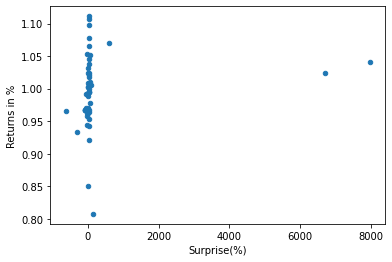

In [ ]:
#TOP 50: Most of the largest stocks try to report with Surprise<100%
top50_volume[['Surprise(%)','Returns in %']].plot.scatter(x='Surprise(%)', y='Returns in %')

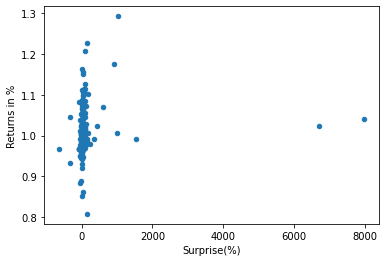

In [ ]:
# TOP 200: Similar to top 50 : but "wider around 0 surprise and returns can be higher (up to 30% in 2 days)"
top200_volume[['Surprise(%)','Returns in %']].plot.scatter(x='Surprise(%)', y='Returns in %')

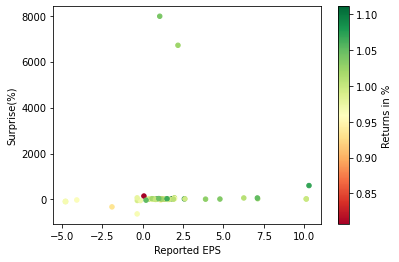

In [ ]:
# TOP 50: Surprise and Reported EPS vs. Returns in %

# HACK : we need subplots to show the axis value
# https://stackoverflow.com/questions/43121584/matplotlib-scatterplot-x-axis-labels
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


top50_volume[['Surprise(%)','Reported EPS','Returns in %']].plot.scatter(x='Reported EPS', y='Surprise(%)', c='Returns in %', colormap='RdYlGn', ax=ax)

In [ ]:
# TOP 200: Surprise and Reported EPS vs. Returns in %
  # Comment: more examples of moderate returns, negative Reported EPS tends to have negative Returns in %

# HACK : we need subplots to show the axis value
# https://stackoverflow.com/questions/43121584/matplotlib-scatterplot-x-axis-labels
fig, ax = plt.subplots()

top200_volume[['Surprise(%)','Reported EPS','Returns in %']].plot.scatter(x='Reported EPS', y='Surprise(%)', c='Returns in %', colormap='RdYlGn', ax=ax)

In [ ]:
# TOP50: Surprise and Reported EPS vs. Adj. Returns in %
  # COMMENT: many stocks have Reported EPS between 0 and 2.5 USD, and positive returns
fig, ax = plt.subplots()


top50_volume[['Surprise(%)','Reported EPS','Adj. Returns in %']].plot.scatter(x='Reported EPS', y='Surprise(%)', c='Adj. Returns in %', colormap='RdYlGn', ax=ax)

In [ ]:
# TOP200: Surprise and Reported EPS vs. Adj. Returns in %
  # COMMENT: less clear picture with many small positive/negative returns
fig, ax = plt.subplots()


top200_volume[['Surprise(%)','Reported EPS','Adj. Returns in %']].plot.scatter(x='Reported EPS', y='Surprise(%)', c='Adj. Returns in %', colormap='RdYlGn', ax=ax)

In [ ]:
# Reported EPS and EPS Estimate vs Returns in %
fig, ax = plt.subplots()

top50_volume.plot.scatter(x='Reported EPS', y='EPS Estimate', c='Returns in %', colormap='RdYlGn', ax=ax)

In [ ]:
# Reported EPS and EPS Estimate vs. Adj.Returns in %
  # COMMENT : similar picture of Adj. Returns vs. Returns

fig, ax = plt.subplots()

top50_volume.plot.scatter(x='Reported EPS', y='EPS Estimate', c='Adj. Returns in %', colormap='RdYlGn', ax=ax)

In [ ]:
# Compare on returns top 50 and top 200 volume-traded stocks
# TOP 200 stocks have more "bell shaped" distribution around 0 and slightly positive returns vs. top 50 stocks
top200_volume['Adj. Returns in %'].hist(bins=50, alpha=0.5)
top50_volume['Adj. Returns in %'].hist(bins=50, alpha = 0.5)

In [ ]:
# AUXILARY GRAPH - maybe don't need to show in the article
# COMMENT: Very high reported EPS lead to high volume trade ()
fig, ax = plt.subplots()


top200_volume[['Adj. Returns in %','Volume Trade USD','Surprise(%)','Reported EPS']].plot.scatter(x='Adj. Returns in %', y='Volume Trade USD', c='Reported EPS', colormap='RdYlGn', ax=ax)
